After learning some opencv, I decided to take a more serious look at the skimage pacakge, simply because of the unsatisfying interface of opencv.

### Resources
1. [user guide](http://scikit-image.org/docs/0.10.x/user_guide.html)
2. [examples](http://scikit-image.org/docs/dev/auto_examples/)
3. Even though I feel skimage has a more pythonic interface, [opencv](http://docs.opencv.org/master/doc/tutorials/tutorials.html) does have a much better explaination of common CV related topics. And it has [opencv-python](http://docs.opencv.org/trunk/doc/py_tutorials/py_tutorials.html) tutorial 

In [4]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

from skimage import img_as_ubyte, img_as_float

%matplotlib inline

### Image Representation
Images in skimage are represnted as numpy ndarrays. However, skimage functions are claimed to support multiple dtypes for images (uint8, uint 16, uint 32, float, int8, int16, int32). Except dtype=float only supports range -1. to 1., all other dtypes support the full ranges. Some key points to take.
- skimage doesn't support uint64 or int64 dtype for now
- skimage functions generally accept all types of images, but may return specific dtype images for convienence
- float images are only valid from -1 to 1
- never use np.asdtype to convert formats of images, because it will lose the range validaty. Instead, `skimage.img_as_xx` to do the conversion, e.g., `img_as_float` (to 64bit float), `img_as_ubyte` (to uint8), `img_as_uint` (to uint16), `img_as_int` (to int16)
- opencv only supports uint8, which makes `img_as_ubyte` necessary

(233, 350, 3) uint8
(233, 350, 3) float64


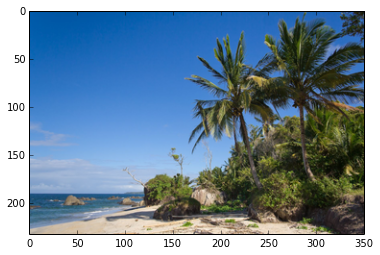

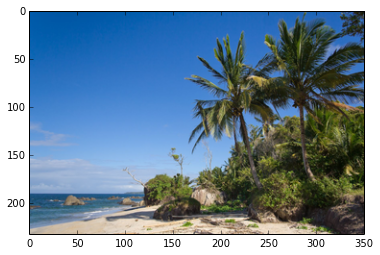

In [2]:
from skimage import img_as_float

beach = io.imread("data/images/beach.png")
plt.imshow(beach)
print beach.shape, beach.dtype

float_beach = img_as_float(beach)
plt.figure()
plt.imshow(float_beach)
print float_beach.shape, float_beach.dtype

***Conversion of Negative Values: negative values are clipped to 0 when converting from signed to unsigned dtypes. Negative values are preserved when converting between signed dtypes.***

In [10]:
## most of time the important conversion will be from float to uint8 (e.g., by opencv)
print img_as_float(np.array([0, 125, 255], np.uint8))
print img_as_ubyte(np.array([-1., 0., 0.25, 1.], np.float64))

[ 0.          0.49019608  1.        ]
[  0   0  64 255]


### A summary of main packages

#### skimage
- utilities, direct exposion of conversion functions

#### color
- color conversion, e.g., rgb2gray

#### data
- datasets, e.g., data.camera, data.lena

#### draw
- image manipulation, e.g., generating coordinates for circle so that an image can be "modified" to draw the circle
- important to generate mask images

#### exposure
- histogram, equalization

#### feature
- global/local image features such as harris, ORB, daisy, hog and etc.

#### filter
- convolution & operations that can be cast into convolution
- so it covers most traditional image processing algorithms
- e.g., blurring filters (gaussian, median), edge detectors (canny, sobel, laplacian), thresholding (adaptive, otsu)

#### filter.rank
- ??

#### io
- read, save and etc

#### measure
- label, contour, etc

#### morphology
- closing/opeing/dilation/erosion, 

#### segmentation
- segementation

#### transform
- AffineTransform, translation, rotation, scaling
- resize, rescale, warp